In [9]:
import yaml
import sys
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os


import load_datasets
import fig_utils


In [10]:
base_dir = os.path.join('sl_results','10Aug21','1','matbench_expt_gap')
path = 'matbench_expt_gap-1939-215-{}-{}.csv'

# get file paths for SL output files 
targets = [[0,10], [10,20], [20,30], [30,40], [40,50], [50,60], [60,70], [70,80], [80,90], [90,100]]

fps = [os.path.join(base_dir,path.format(target[0], target[1])) for target in targets]


In [11]:
# Calculate Discovery Acceleration Factor (DAF) Heatmap plot traces
# DAF calculated via calculate_DAF() in fig_utils

# af = acquisition function, tr = target ranges, DAF = Discovery Acceleration Factor
af1, tr1, DAF1 = fig_utils.get_DAF_heatmap_traces(fps, n_targets=1)
af3, tr3, DAF3 = fig_utils.get_DAF_heatmap_traces(fps, n_targets=3)
af5, tr5, DAF5 = fig_utils.get_DAF_heatmap_traces(fps, n_targets=5)

{'EV': (5.3, 7.3), 'EI': (2.7, 2.4), 'MU': (41.2, 23.9), 'Random': (9.8, 8.4)}
0-10 {'EV': (1.9, 2.6), 'EI': (3.7, 3.3), 'MU': (0.2, 0.1), 'Random': (1.0, 0.9)}
{'EV': (4.5, 3.7), 'EI': (4.2, 3.7), 'MU': (15.7, 9.6), 'Random': (11.3, 10.1)}
10-20 {'EV': (2.2, 1.8), 'EI': (2.4, 2.1), 'MU': (0.6, 0.4), 'Random': (0.9, 0.8)}
{'EV': (5.3, 4.8), 'EI': (3.7, 2.6), 'MU': (29.5, 23.6), 'Random': (8.6, 6.5)}
20-30 {'EV': (1.9, 1.7), 'EI': (2.7, 1.9), 'MU': (0.3, 0.3), 'Random': (1.2, 0.9)}
{'EV': (4.3, 5.3), 'EI': (2.5, 3.2), 'MU': (13.1, 18.4), 'Random': (4.9, 6.2)}
30-40 {'EV': (2.3, 2.9), 'EI': (4.0, 5.1), 'MU': (0.8, 1.1), 'Random': (2.0, 2.6)}
{'EV': (4.6, 6.1), 'EI': (3.3, 4.2), 'MU': (13.9, 17.0), 'Random': (6.7, 8.8)}
40-50 {'EV': (2.2, 2.9), 'EI': (3.0, 3.9), 'MU': (0.7, 0.9), 'Random': (1.5, 2.0)}
{'EV': (4.1, 3.8), 'EI': (3.2, 2.6), 'MU': (13.7, 13.8), 'Random': (9.8, 11.9)}
50-60 {'EV': (2.4, 2.3), 'EI': (3.1, 2.5), 'MU': (0.7, 0.7), 'Random': (1.0, 1.2)}
{'EV': (3.8, 4.1), 'EI': (2

In [13]:
basedir = 'configuration_files'
dataset_path = os.path.join('dataset_configs','matbench_expt_gap.yaml')
sl_path = os.path.join('sl_configs','1.yaml')

with open(os.path.join(basedir,dataset_path)) as file:
    sl_config = yaml.load(file, Loader=yaml.FullLoader)

with open(os.path.join(basedir,sl_path)) as file:
    sl_config.update(yaml.load(file, Loader=yaml.FullLoader))

print(sl_config)

{'dataset': 'matbench_expt_gap', 'output': 'gap expt', 'categoricals': None, 'config_id': 1, 'n_sample': 0, 'n_training': 50, 'iterations': 100, 'trials': 100, 'batch': 1, 'discovery_break_number': 0, 'poi': None, 'holdout_fraction': 0.1, 'targets': [[0, 10]]}


In [6]:
df = load_datasets.get_matbench_dataset(sl_config['dataset'], sl_config['output'])
df = load_datasets.featurize_composition(df, sl_config['output'])
df = load_datasets.group_and_index_formula(df, None, sl_config['output'])

StrToComposition:   0%|          | 0/2154 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/2154 [00:00<?, ?it/s]

This is the format of your plot grid:
⎡ (1,1) x,y   ⎤
⎣      :      ⎦
[ (3,1) x2,y2 ]
[ (4,1) x3,y3 ]
[ (5,1) x4,y4 ]



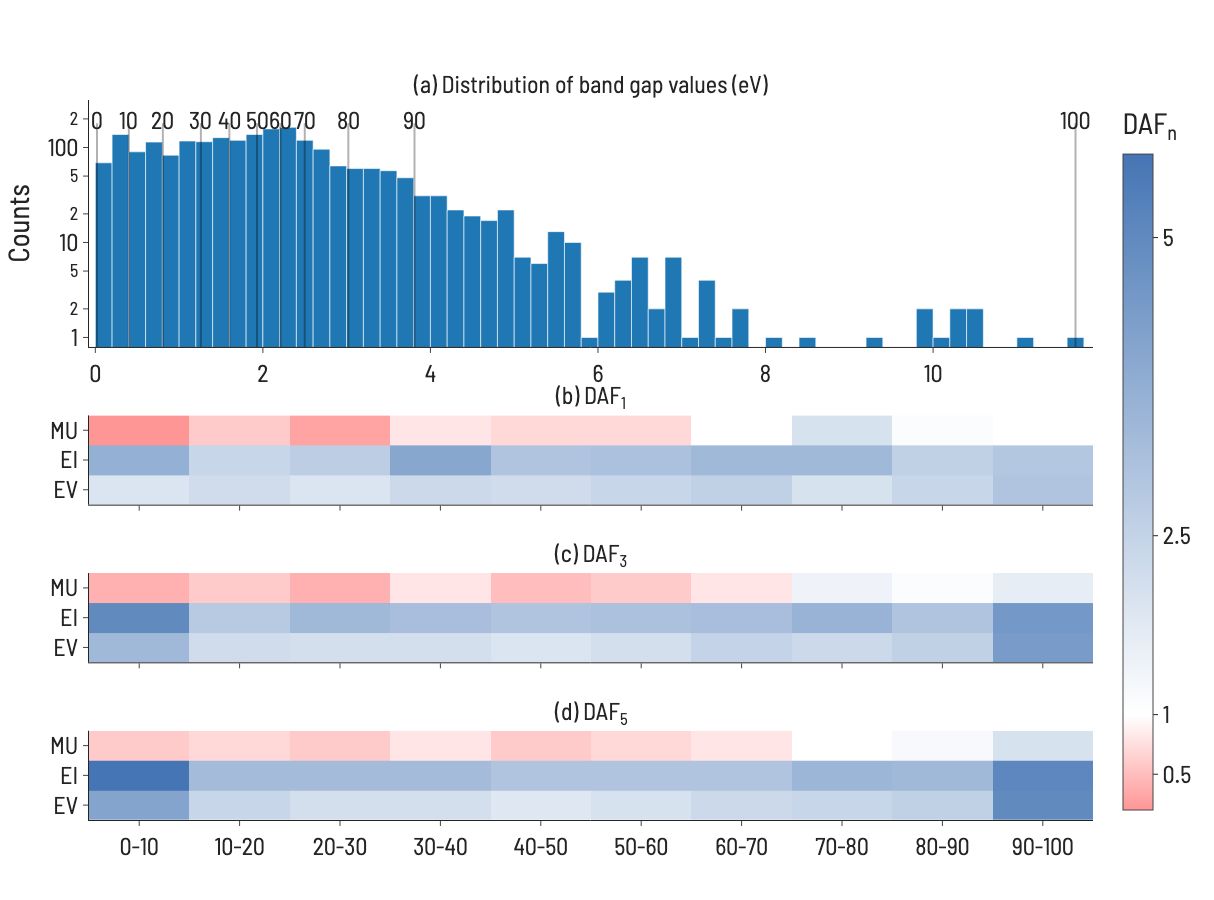

In [17]:
# initialize figure
fig = make_subplots(
    rows=5, cols=1,
    specs=[[{'rowspan':2}],
          [None],
          [{}], [{}], [{}]],
    shared_xaxes=True,
    vertical_spacing=0.095,
    print_grid=True,
    subplot_titles=['(a) Distribution of band gap values (eV)', '(b) DAF<sub>1</sub>', '(c) DAF<sub>3</sub>', '(d) DAF<sub>5</sub>']
)

# caculate decile lines for dataset distribution (a)
for q in np.arange(0,1, 0.1):
    
    q_min = q
    q_max = q+0.1
    
    q1_val = df[sl_config['output']].quantile(q_min)
    q2_val = df[sl_config['output']].quantile(q_max)
    # print(q_min, '----', q_max, ': ', q1_val, q2_val)

    fig.add_shape(type='line',
                    yref="y",
                    xref="x",
                    x0=q1_val,
                    y0=0,
                    x1=q1_val,
                    y1=180,
                    line=dict(color='black', width=2))  
    
    fig.add_annotation(x=q1_val, y=2.3,
            text=round(q_min*100),
            showarrow=False,
            font=dict(size=16))
    
    if q_max == 1:
    
        fig.add_shape(type='line',
                        yref="y",
                        xref="x",
                        x0=q2_val,
                        y0=0,
                        x1=q2_val,
                        y1=180,
                        line=dict(color='black', width=2))  

        fig.add_annotation(x=q2_val, y=2.3,
                text=round(q_max*100),
                showarrow=False,
                font=dict(size=16))
    
# histogram of dataset
fig.add_trace(go.Histogram(x=[x for x in df[sl_config['output']]], nbinsx=100), row=1, col=1)

    
# DAF heatmaps
fig.add_trace(go.Heatmap(z=DAF1, x=tr1, y=af1, hoverongaps = False, coloraxis = "coloraxis"), row=3, col=1)
fig.add_trace(go.Heatmap(z=DAF3, x=tr3, y=af3, hoverongaps = False, coloraxis = "coloraxis"), row=4, col=1)
fig.add_trace(go.Heatmap(z=DAF5, x=tr5, y=af5, hoverongaps = False, coloraxis = "coloraxis"), row=5, col=1)

# calculate a custom colorscalce where the midpoint = white, low=red, high=blue
color_vals = np.array([DAF1+DAF3+DAF5])
c_min = color_vals.min()
c_max = color_vals.max()

midpoint_color = ((1-c_min)/(c_max-c_min))

custom_balance_r= [
    [0.0, 'rgb(255, 150, 150)'],
    [midpoint_color, 'rgb(255,255,255)'],
    [1, 'rgb(69,117,180)']]

fig.update_layout(coloraxis = {'colorscale':custom_balance_r, 'colorbar':{'tickvals':[0,0.5,1,2.5,5], 'title':'DAF<sub>n</sub>'}})
fig.update_layout(xaxis_showticklabels=True)

fig.update_layout(coloraxis_colorbar=dict(
#     lenmode="pixels", 
    len=1,
))

fig.update_yaxes(title_text='Counts', type="log", range=[-0.1,2.5], row=1, col=1)
fig.update_layout(font=dict(family="Barlow Semi Condensed", size=24), width=1200, height=900,  showlegend=False)
fig.update_annotations(font=dict(family="Barlow Semi Condensed", size=24))

fig.write_image(os.path.join('static','fig3-DAF-matbench_expt_gap.png'), scale=2)
fig.show()